<a href="https://colab.research.google.com/github/minhaz1172/Deep-Learning/blob/main/keras_Functional_Api.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# california housing datasets to predict by functional api

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler


# load the dataset

In [2]:
data=fetch_california_housing()
df=pd.DataFrame(data.data,columns=data.feature_names)
df['Target']=data.target #data.target values were already part of the full dataset
print(df.head())



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  Target  
0    -122.23   4.526  
1    -122.22   3.585  
2    -122.24   3.521  
3    -122.25   3.413  
4    -122.25   3.422  


# X has shape (n_samples, 8)    AND  For demonstration, split the data into two groups of features:
# Group 1: first 4 features, Group 2: last 4 features.

In [3]:
X,y=data.data,data.target

input1=X[:,:4]
input2=X[:,4:]
print(input1.shape,input2.shape)

(20640, 4) (20640, 4)


**# input1=scaler1.fit_transform(input1)**
standardizing the inputs.

👉 What it does:

Subtracts the mean from each feature

Divides by standard deviation

Result: Each feature has mean ≈ 0 and standard deviation ≈ 1

👉 Why?

Many ML models (e.g., linear regression, SVM, neural networks) perform better when input features are scaled.


# **y = y.reshape(-1, 1)**
#  y from a 1D array (like [2.5, 3.6, ...]) to a 2D array (like [[2.5], [3.6], ...]).

👉 Why?

StandardScaler expects 2D input.

Machine learning pipelines often need target arrays in 2D for consistency during preprocessing.

fit_transform() first calculates mean and std of input1_data, then transforms it.

Now, input1_data is standardized. **bold text**

#SCALE BOTH INPUTS and target variable

In [4]:
scaler1=StandardScaler()
scaler2=StandardScaler()
input1=scaler1.fit_transform(input1)
input2= scaler2.fit_transform(input2)

y=y.reshape(-1,1) # reshape target to 2D for scaling
scale_y=StandardScaler()
y=scale_y.fit_transform(y)

# # Split the data into training and test sets (80-20 split)

In [5]:
X1_train,X1_test,X2_train,X2_test,y_train,y_test=train_test_split(input1,input2,y,test_size=0.2,random_state=42)

# building the model

In [6]:
import tensorflow as tf
from tensorflow.keras.layers import Input,Dense,concatenate
from tensorflow.keras.models import Model

#define two layers
input_A=Input(shape=(4,),name="Input_A")
input_B=Input(shape=(4,),name="Input_B")

#Branch for input A
x1=Dense(32,activation='relu')(input_A)
x1=Dense(16,activation='relu')(x1)

# Branch for input_B
x2=Dense(32,activation='relu')(input_B)
x2=Dense(16,activation='relu')(x2)

combined=concatenate([x1,x2],name="concatenated_layer")

# Add subsequent layers on the combined representation

z=Dense(32,activation='relu')(combined)
output=Dense(1,activation='linear',name="output")(z) #The final layer has 1 neuron with a linear activation, suitable for regression tasks

# building the model
model=Model(inputs=[input_A,input_B],outputs=output)

#display model summary
model.summary()


Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ Input_A             │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ Input_B             │ (None, 4)         │          0 │ -                 │
│ (InputLayer)        │                   │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense (Dense)       │ (None, 32)        │        160 │ Input_A[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_2 (Dense)     │ (None, 32)        │        160 │ Input_B[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_1 (Dense)     │ (None, 16)        │        528 │ dense[0][0]       │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_3 (Dense)     │ (None, 16)        │        528 │ dense_2[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ concatenated_layer  │ (None, 32)        │          0 │ dense_1[0][0],    │
│ (Concatenate)       │                   │            │ dense_3[0][0]     │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_4 (Dense)     │ (None, 32)        │      1,056 │ concatenated_lay… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ output (Dense)      │ (None, 1)         │         33 │ dense_4[0][0]     │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 2,465 (9.63 KB)

 Trainable params: 2,465 (9.63 KB)

 Non-trainable params: 0 (0.00 B)

In [14]:
print(len(X1_train)) # seeing how many data in x_train

16512


# Model compilation and training

In [17]:
model.compile(optimizer='adam',loss='mse',metrics=["mae"]) #MSE means Mean Squared Error used in regression problems

# It’s used when solving regression problems (predicting continuous values).


# train the model
history=model.fit(
    x=[X1_train,X2_train],
    y=y_train,
    epochs=20,
    validation_split=0.2,
    batch_size=32
)

Epoch 1/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 4s 3ms/step - loss: 0.2029 - mae: 0.3090 - val_loss: 0.2159 - val_mae: 0.3198
Epoch 2/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.2019 - mae: 0.3091 - val_loss: 0.2244 - val_mae: 0.3216
Epoch 3/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1976 - mae: 0.3034 - val_loss: 0.2231 - val_mae: 0.3262
Epoch 4/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1945 - mae: 0.3014 - val_loss: 0.2245 - val_mae: 0.3304
Epoch 5/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1988 - mae: 0.3092 - val_loss: 0.2120 - val_mae: 0.3142
Epoch 6/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1876 - mae: 0.2974 - val_loss: 0.2225 - val_mae: 0.3157
Epoch 7/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - loss: 0.1945 - mae: 0.3020 - val_loss: 0.2141 - val_mae: 0.3090
Epoch 8/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - loss: 0.1972 - mae: 0.3006 - val_loss: 0.2142 - val_mae: 0.3203
Epoch 9/20
413/413 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - lo

# Predictions on test data

predictions are still in the scaled format.

inverse_transform() converts those predictions back to the original scale of the target variable (e.g., actual price, score, etc.).

In [18]:
predictions=model.predict([X1_test,X2_test])

#inverse transform predictions to the original scale
predictions_original_scale=scale_y.inverse_transform(predictions)

129/129 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step


# evaluating the model on test data

In [19]:
test_loss,test_mae=model.evaluate([X1_test,X2_test],y_test,verbose=0)
print(f"Test Loss: {test_loss:.4f}")
print(f"Test MAE: {test_mae:.4f}")

Test Loss: 0.2045
Test MAE: 0.3056


# plotting the loss curves

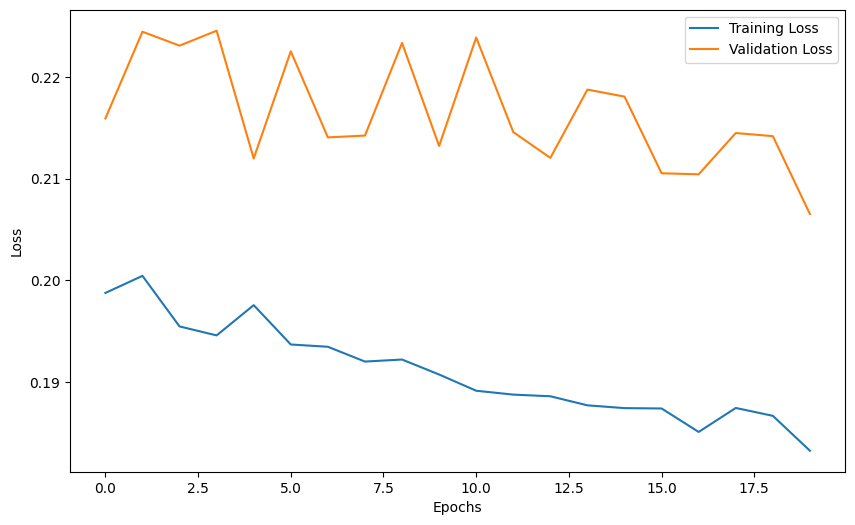

In [22]:
import matplotlib.pyplot as plt

# plot training and validation
plt.figure(figsize=(10,6))
plt.plot(history.history['loss'],label='Training Loss')
if 'val_loss' in history.history:
  plt.plot(history.history['val_loss'],label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()